## Observations and Insights 

In [258]:
#Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


#data files
mouse_metadata_path = "Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_complete_results = pd.merge(mouse_metadata, study_results, on=["Mouse ID"])
# Display the data table for preview
mouse_study_complete_results


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [259]:
# Checking the number of mice.
mouse_ID_count = mouse_study_complete_results["Mouse ID"].count()
print(mouse_ID_count)

unique_mouse_count = mouse_metadata["Mouse ID"].count()
unique_mouse_count

1893


249

In [260]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#find duplicates
#mouse_duplicates = mouse_study_complete_results.duplicated(subset=['Mouse ID', 'Timepoint'])
mouse_duplicates = mouse_study_complete_results[mouse_study_complete_results[['Mouse ID', 'Timepoint']].duplicated() == True]
mouse_duplicates


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [261]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_clean_data = mouse_study_complete_results.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='last')

# Checking the number of mice in the clean DataFrame.
unique_mouse_clean_data = mouse_clean_data['Mouse ID'].count()
print(unique_mouse_clean_data)


1888


## Summary Statistics

In [262]:
# Generate a summary statistics table of mean of the tumour volume for each regimen
drug_regimen_mean = mouse_clean_data.groupby('Drug Regimen')['Tumour Volume (mm3)'].mean()
drug_regimen_mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.382993
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumour Volume (mm3), dtype: float64

In [263]:
# Generate a summary statistics table of variance of the tumour volume for each regimen
drug_regimen_variance = mouse_clean_data.groupby('Drug Regimen')['Tumour Volume (mm3)'].var()
drug_regimen_variance

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.220205
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumour Volume (mm3), dtype: float64

In [264]:
# Generate a summary statistics table of median of the tumour volume for each regimen
drug_regimen_median = mouse_clean_data.groupby('Drug Regimen')['Tumour Volume (mm3)'].median()
drug_regimen_median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.783528
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumour Volume (mm3), dtype: float64

In [265]:
# Generate a summary statistics table of standard deviation of the tumour volume for each regimen
drug_regimen_std_dev = mouse_clean_data.groupby('Drug Regimen')['Tumour Volume (mm3)'].std()
drug_regimen_std_dev

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.574208
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumour Volume (mm3), dtype: float64

In [266]:
# Generate a summary statistics table for SEM of the tumour volume for each regimen
drug_regimen_sem = mouse_clean_data.groupby('Drug Regimen')['Tumour Volume (mm3)'].sem()
drug_regimen_sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.526358
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumour Volume (mm3), dtype: float64

In [268]:
# Assemble the resulting series into a single summary dataframe.
# Combine the mean and median data into a single dataset
tumour_volume_combined = pd.merge(drug_regimen_mean, drug_regimen_median, how='outer', on=["Drug Regimen"])

#Rename columns x to mean and y to median
tumour_volume_combined = tumour_volume_combined.rename(columns={"Tumour Volume (mm3)_x":"Tumour Volume (mm3) mean",
                                                            "Tumour Volume (mm3)_y":"Tumour Volume (mm3) median"})

# Combine the variance into the combined dataset
tumour_volume_combined = pd.merge(tumour_volume_combined, drug_regimen_variance, how='outer', on=["Drug Regimen"])

# Combine the std dev into the combined dataset
tumour_volume_combined = pd.merge(tumour_volume_combined, drug_regimen_std_dev, how='outer', on=["Drug Regimen"])

#Rename columns x to variance and y to std dev
tumour_volume_combined = tumour_volume_combined.rename(columns={"Tumour Volume (mm3)_x":"Tumour Volume (mm3) variance",
                                                            "Tumour Volume (mm3)_y":"Tumour Volume (mm3) std dev"})

# Combine the sem into the combined dataset
tumour_volume_combined = pd.merge(tumour_volume_combined, drug_regimen_sem, how='outer', on=["Drug Regimen"])

#Rename columns x to SEM
summary_statistics = tumour_volume_combined.rename(columns={"Tumour Volume (mm3)":"Tumour Volume (mm3) SEM"})
summary_statistics


,Tumour Volume (mm3) mean,Tumour Volume (mm3) median,Tumour Volume (mm3) variance,Tumour Volume (mm3) std dev,Tumour Volume (mm3) SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [286]:
#Using the aggregation method, produce the same summary statistics in a single line
#summary_agg = tumour_volume_combined.groupby('Drug Regimen')[['Tumour Volume (mm3) mean','Tumour Volume (mm3) median',
#                                     'Tumour Volume (mm3) median','Tumour Volume (mm3) variance',
#                                     'Tumour Volume (mm3) std dev','Tumour Volume (mm3) SEM']].agg('sum')

#summary_agg = tumour_volume_combined['Tumour Volume (mm3) mean'].agg()
#summary_agg

summary_agg_mean = tumour_volume_combined['Tumour Volume (mm3) mean'].agg('mean')
summary_agg_median = tumour_volume_combined['Tumour Volume (mm3) median'].agg('median')
summary_agg_var = tumour_volume_combined['Tumour Volume (mm3) variance'].agg('var')
summary_agg_stddev = tumour_volume_combined['Tumour Volume (mm3) std dev'].agg('std')
summary_agg_sem = tumour_volume_combined['Tumour Volume (mm3) SEM'].agg('sem')

print(summary_agg_mean)
print(summary_agg_median)
print(summary_agg_var)
print(summary_agg_stddev)
#print(summary_agg_sem)




KeyError: 'Tumour Volume (mm3) SEM'

## Bar and Pie Charts

Text(0, 0.5, 'Total Mice')

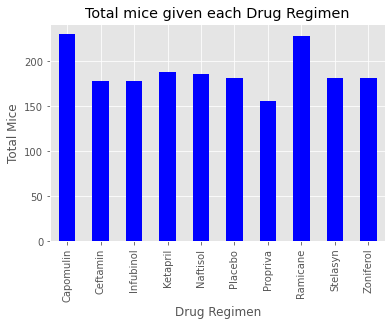

In [274]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
#Split up data to show each drug regimen type
regimen_names = mouse_clean_data.groupby('Drug Regimen')

#find out how many mice were given each drug regimen type
timepoint = regimen_names['Timepoint'].count()

#chart the data and include title and x-axis and y-axis labels
timepoint_chart = timepoint.plot(kind='bar', color='b', title='Total mice given each Drug Regimen')
timepoint_chart.set_xlabel('Drug Regimen')
timepoint_chart.set_ylabel('Total Mice')


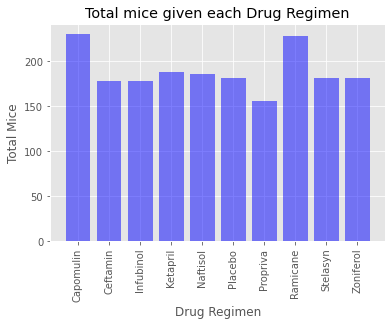

In [272]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = timepoint.index.values
y_axis = timepoint.values
plt.bar(x_axis, timepoint, color='b', alpha=0.5, align="center")
plt.xticks(rotation='vertical')
plt.xlabel('Drug Regimen')
plt.ylabel('Total Mice')
plt.title('Total mice given each Drug Regimen');


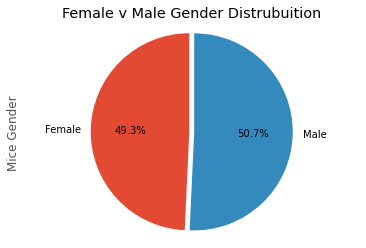

In [275]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_gender = mouse_clean_data.groupby('Sex')['Sex'].count()

#Create pie chart
mouse_gender_pie = mouse_gender.plot(kind='pie', y='Sex', title=("Female v Male Gender Distrubuition"), autopct="%1.1f%%",
                                        explode=explode, startangle=90)
mouse_gender_pie.set_ylabel("Mice Gender")

plt.axis("equal")

mouse_gender_pie;



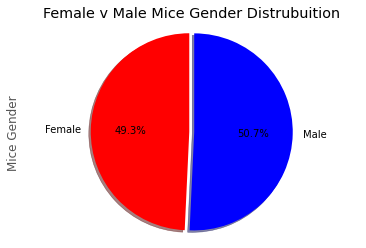

In [276]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mouse_gender = mouse_clean_data.groupby('Sex')['Sex'].count()
sex = ["Female","Male"]
quantity = [mouse_gender]
colors = ["red", "blue"]
explode = (0,0.05)

plt.title("Female v Male Mice Gender Distrubuition")
plt.pie(mouse_gender, explode=explode, labels=sex, colors=colors, autopct="%1.1f%%", startangle=90, shadow=True,)
plt.ylabel("Mice Gender")
plt.axis("equal");


## Quartiles, Outliers and Boxplots

In [278]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumour volume at the last timepoint

In [279]:
# Start by getting the last (greatest) timepoint for each mouse
mouse_timepoint_last = mouse_clean_data.groupby('Mouse ID')['Timepoint'].max()

mouse_timepoint_last.head()

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
Name: Timepoint, dtype: int64

In [280]:
# Merge this group df with the original dataframe to get the tumour volume at the last timepoint
new_mouse_clean_data = pd.merge(mouse_clean_data, mouse_timepoint_last, on=('Mouse ID','Timepoint'), how='right')
new_mouse_clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1


In [281]:
#Create list for the required treatments
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

In [282]:
#Create lists for tumour volume
tumour_vol_cap = []
tumour_vol_ram = []
tumour_vol_inf = [] 
tumour_vol_cef = []


In [283]:
#Loop through each drug in the treatment list, locating the rows in the merged DataFrame that correspond to each treatment. 
#Append the resulting final tumour volumes for each drug to the empty list.
for index, row in new_mouse_clean_data.iterrows():
        if row["Drug Regimen"] == treatments[0]:
                tumour_vol_cap.append(row['Tumour Volume (mm3)'])
        if row["Drug Regimen"] == treatments[1]:
                tumour_vol_ram.append(row['Tumour Volume (mm3)'])
        if row["Drug Regimen"] == treatments[2]:
                tumour_vol_inf.append(row['Tumour Volume (mm3)'])
        if row["Drug Regimen"] == treatments[3]:
                tumour_vol_cef.append(row['Tumour Volume (mm3)']) 

#create dataframe that matches tumour data to the treatment
drug_treatment = pd.DataFrame({treatments[0]: tumour_vol_cap,
                                treatments[1]: tumour_vol_ram,
                                treatments[2]: tumour_vol_inf,
                                treatments[3]: tumour_vol_cef})        
drug_treatment.head()


,Capomulin,Ramicane,Infubinol,Ceftamin
0,23.343598,22.050126,67.973419,62.999356
1,28.484033,29.128472,65.525743,45.000000
2,28.430964,30.276232,57.031862,56.057749
3,30.485985,30.564625,66.083066,55.742829
4,31.023923,30.638696,72.226731,48.722078


In [284]:
#Work out iqr and upper/lower bound for Capomulin
quartiles_cap = drug_treatment[treatments[0]].quantile([.25,.5,.75])
lowerq_cap = quartiles_cap[0.25]
upperq_cap = quartiles_cap[0.75]
iqr_cap = upperq_cap - lowerq_cap
lwr_bound_cap = lowerq_cap - (1.5*iqr_cap)
upr_bound_cap = upperq_cap + (1.5*iqr_cap)

#Work out iqr and upper/lower bound for Ramicane
quartiles_ram = drug_treatment[treatments[1]].quantile([.25,.5,.75])
lowerq_ram = quartiles_ram[0.25]
upperq_ram = quartiles_ram[0.75]
iqr_ram = upperq_ram - lowerq_ram
lwr_bound_ram = lowerq_ram - (1.5*iqr_ram)
upr_bound_ram = upperq_ram + (1.5*iqr_ram)

#Work out iqr and upper/lower bound for Infubinol
quartiles_inf = drug_treatment[treatments[2]].quantile([.25,.5,.75])
lowerq_inf = quartiles_inf[0.25]
upperq_inf = quartiles_inf[0.75]
iqr_inf = upperq_inf - lowerq_inf
lwr_bound_inf = lowerq_inf - (1.5*iqr_inf)
upr_bound_inf = upperq_inf + (1.5*iqr_inf)

#Work out iqr and upper/lower bound for Ceftamin
quartiles_cef = drug_treatment[treatments[3]].quantile([.25,.5,.75])
lowerq_cef = quartiles_cef[0.25]
upperq_cef = quartiles_cef[0.75]
iqr_cef = upperq_cef - lowerq_cef
lwr_bound_cef = lowerq_cef - (1.5*iqr_cef)
upr_bound_cef = upperq_cef + (1.5*iqr_cef)


#print values above/below bound for each drug treatment
print(f"Values below {lwr_bound_cap} for Capomulin could be outliers.")
print(f"Values above {upr_bound_cap} for Capomulin could be outliers.")
print(f"Values below {lwr_bound_ram} for Ramicane could be outliers.")
print(f"Values above {upr_bound_ram} for Ramicane could be outliers.")
print(f"Values below {lwr_bound_inf} for Infubinol could be outliers.")
print(f"Values above {upr_bound_inf} for Infubinol could be outliers.")
print(f"Values below {lwr_bound_cef} for Ceftamin could be outliers.")
print(f"Values above {upr_bound_cef} for Ceftamin could be outliers.")

Values below 20.70456164999999 for Capomulin could be outliers.
Values above 51.83201549 for Capomulin could be outliers.
Values below 17.912664470000003 for Ramicane could be outliers.
Values above 54.30681135 for Ramicane could be outliers.
Values below 36.83290494999999 for Infubinol could be outliers.
Values above 82.74144559000001 for Infubinol could be outliers.
Values below 25.355449580000002 for Ceftamin could be outliers.
Values above 87.66645829999999 for Ceftamin could be outliers.


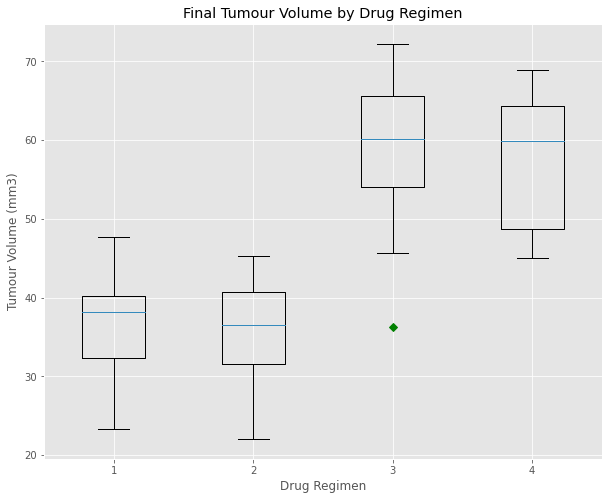

In [285]:
#create boxplot
boxplot_treatment = [drug_treatment[treatments[0]], drug_treatment[treatments[1]],
                    drug_treatment[treatments[2]], drug_treatment[treatments[3]]]

fig1, ax1 = plt.subplots(figsize=(10,8))

ax1.set_title('Final Tumour Volume by Drug Regimen')
ax1.set_ylabel('Tumour Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(boxplot_treatment, 0, 'gD');
plt.savefig('boxplot')


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumour volume vs. time point for a mouse treated with Capomulin

In [ ]:
# Generate a scatter plot of average tumour volume vs. mouse weight for the Capomulin regimen

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumour volume for the Capomulin regimen